# Load Data

In [ ]:
# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".
!ls "/content/drive/My Drive/Udacity-MLE-Capstone-Starbucks-data/"

data			  dataOfferViewedY.pkl	dataX.pkl
dataOfferCompAdjRevX.pkl  dataRegX.pkl		dataY.csv
dataOfferCompAdjRevY.pkl  dataRegY.pkl		dataY.pkl
dataOfferCompX.pkl	  dataViewedX.pkl	preprocessedData
dataOfferCompY.pkl	  dataViewedY.pkl
dataOfferViewedX.pkl	  dataX.csv


In [ ]:
import pandas as pd
import numpy as np
import math
import json
% matplotlib inline

from matplotlib import pyplot as plt

filePath = "/content/drive/My Drive/Udacity-MLE-Capstone-Starbucks-data/"

# read in the json files
portfolio = pd.read_json(filePath+'data/portfolio.json', orient='records', lines=True)
profile = pd.read_json(filePath+'data/profile.json', orient='records', lines=True)
transcript = pd.read_json(filePath+'data/transcript.json', orient='records', lines=True)

# Upload preprocessed data
transcriptTransformRec = pd.read_pickle(filePath+'preprocessedData/transcriptTransformRec_v1.pkl')

profileClean = pd.read_pickle(filePath+'preprocessedData/profileClean_v1.pkl')
portfolioClean = pd.read_pickle(filePath+'preprocessedData/portfolioClean_v1.pkl')
transcriptCleanOld = pd.read_pickle(filePath+'preprocessedData/transcriptClean_v1.pkl')


In [ ]:
transcriptTransformRec

,customer_id,event,amount,offer_id,reward,time_days,offer_completed,offer_viewed,offer_compViewed,offer_compNotViewed,compTransAmt,rewardReceived,adjRev,offerTrans
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,0.0,1,1,1,0,19.89,5.0,14.89,37.67
1,a03223e636434f42ac4c3df47e8bac43,offer received,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,0.0,0,1,0,0,0.00,0.0,0.00,1.09
2,e2127556f4f64592b11af22de27a7932,offer received,NaN,2906b810c7d4411798c6938adc9daaa5,NaN,0.0,0,1,0,0,0.00,0.0,0.00,0.00
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,NaN,fafdcd668e3743c1bb461111dcafc2a4,NaN,0.0,0,1,0,0,0.00,0.0,0.00,0.00
4,68617ca6246f4fbc85e91a2a49552598,offer received,NaN,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,0.0,0,1,0,0,0.00,0.0,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257882,d087c473b4d247ccb0abfef59ba12b0e,offer received,NaN,ae264e3637204a6fb9bb56bc8210ddfd,NaN,24.0,1,1,0,1,20.78,10.0,10.78,35.55
257883,cb23b66c56f64b109d673d5e56574529,offer received,NaN,2906b810c7d4411798c6938adc9daaa5,NaN,24.0,0,0,0,0,0.00,0.0,0.00,0.00
257884,6d5f3a774f3d4714ab0c092238f3a1d7,offer received,NaN,2298d6c36e964ae4a3e7e9706d1fb8c2,NaN,24.0,0,1,0,0,0.00,0.0,0.00,6.76
257885,9dc1421481194dcd9400aec7c9ae6366,offer received,NaN,ae264e3637204a6fb9bb56bc8210ddfd,NaN,24.0,1,1,0,1,12.57,10.0,2.57,58.50


In [ ]:
# Get indices of completed offers
offerCompIdx = transcriptTransformRec[transcriptTransformRec.offer_completed == 1].index.tolist()
  
# Statistics describing the reward amounts
transcriptTransformRec[transcriptTransformRec.offer_completed == 1].compTransAmt.describe()

count    33631.000000
mean        22.497277
std         40.021525
min          0.590000
25%         12.680000
50%         18.460000
75%         24.950000
max       1015.730000
Name: compTransAmt, dtype: float64

In [ ]:
# Statistics describing the reward amounts
transcriptTransformRec[transcriptTransformRec.offer_completed == 1].adjRev.describe()

count    33631.000000
mean        17.595579
std         40.007718
min         -4.000000
25%          8.270000
50%         13.550000
75%         20.130000
max       1005.730000
Name: adjRev, dtype: float64

Text(0.5, 1.0, 'Distribution of Completed Offer Transaction Revenue')

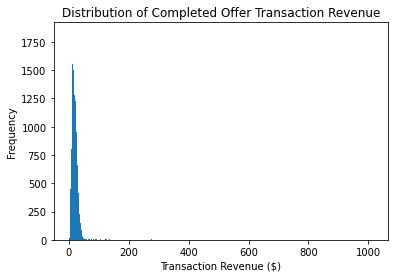

In [ ]:
fig = plt.figure()
ax = transcriptTransformRec[transcriptTransformRec.offer_completed == 1].compTransAmt.plot.hist(bins=1000)
plt.xlabel('Transaction Revenue ($)')
plt.ylabel('Frequency')
plt.title('Distribution of Completed Offer Transaction Revenue')

(0.0, 60.0)

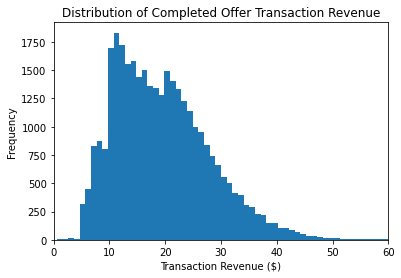

In [ ]:
fig = plt.figure()
ax = transcriptTransformRec[transcriptTransformRec.offer_completed == 1].compTransAmt.plot.hist(bins=1000)
plt.xlabel('Transaction Revenue ($)')
plt.ylabel('Frequency')
plt.title('Distribution of Completed Offer Transaction Revenue')
plt.xlim(0, 60)

Text(0.5, 1.0, 'Distribution of Transaction Amounts')

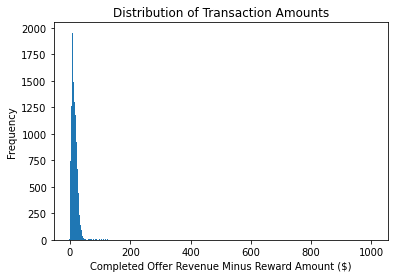

In [ ]:
fig = plt.figure()
ax = transcriptTransformRec[transcriptTransformRec.offer_completed == 1].adjRev.plot.hist(bins=1000)
plt.xlabel('Completed Offer Revenue Minus Reward Amount ($)')
plt.ylabel('Frequency')
plt.title('Distribution of Transaction Amounts')

# Additional Preprocessing

In [ ]:
portfolio

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,3,"[web, email, mobile, social]",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,2,"[web, email, mobile, social]",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,0,"[email, mobile, social]",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,5,"[web, email, mobile, social]",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,2,"[web, email, mobile]",10,7,discount,2906b810c7d4411798c6938adc9daaa5


In [ ]:
from sklearn import preprocessing

def normalizePorfolio(df):
    
    # Initialize a min-max scaler object
    #scaler = MinMaxScaler()
    
    normalized_df=(df-df.min())/(df.max()-df.min())

    return normalized_df

In [ ]:
normalizeColumns = ['difficulty', 'duration', 'reward']

normalizedPorfolio = normalizePorfolio(portfolioClean[normalizeColumns])

In [ ]:
normalizedPorfolio

,difficulty,duration,reward
0,0.50,0.571429,1.0
1,0.50,0.285714,1.0
2,0.00,0.142857,0.0
3,0.25,0.571429,0.5
4,1.00,1.000000,0.5
5,0.35,0.571429,0.3
6,0.50,1.000000,0.2
7,0.00,0.000000,0.0
8,0.25,0.285714,0.5
9,0.50,0.571429,0.2


In [ ]:
# Create cleaned and normalized 'profile' dataset
portfolioClean[normalizeColumns] = normalizedPorfolio[normalizeColumns]

portfolioClean

,offer_id,difficulty,duration,reward,chan_social,chan_email,chan_web,chan_mobile,offerType,offer_type_bogo,offer_type_discount,offer_type_informational
0,ae264e3637204a6fb9bb56bc8210ddfd,0.50,0.571429,1.0,1,1,0,1,bogo,1,0,0
1,4d5c57ea9a6940dd891ad53e9dbe8da0,0.50,0.285714,1.0,1,1,1,1,bogo,1,0,0
2,3f207df678b143eea3cee63160fa8bed,0.00,0.142857,0.0,0,1,1,1,informational,0,0,1
3,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.25,0.571429,0.5,0,1,1,1,bogo,1,0,0
4,0b1e1539f2cc45b7b9fa7c272da2e1d7,1.00,1.000000,0.5,0,1,1,0,discount,0,1,0
5,2298d6c36e964ae4a3e7e9706d1fb8c2,0.35,0.571429,0.3,1,1,1,1,discount,0,1,0
6,fafdcd668e3743c1bb461111dcafc2a4,0.50,1.000000,0.2,1,1,1,1,discount,0,1,0
7,5a8bc65990b245e5a138643cd4eb9837,0.00,0.000000,0.0,1,1,0,1,informational,0,0,1
8,f19421c1d4aa40978ebb69ca19b0e20d,0.25,0.285714,0.5,1,1,1,1,bogo,1,0,0
9,2906b810c7d4411798c6938adc9daaa5,0.50,0.571429,0.2,0,1,1,1,discount,0,1,0


# Merge Data

In [ ]:
def merge_data(portfolio,profile,transcript):
    """
    Merge cleaned data frames for EDA
       
    Parameters
    ---------- 
    portfolio : cleaned portfolio data frame
    profile : cleaned profile data frame
    transcript : cleaned transcript data frame
      
    Returns
    -------
    merged_df: merged data frame
    
    """
    
    #merged_df = pd.merge(transcript, profile, on='customer_id')
    merged_df = pd.merge(portfolio, transcript, on='offer_id')
    merged_df = pd.merge(merged_df, profile, on='customer_id')
    
    return merged_df

In [ ]:
merged_df = merge_data(portfolioClean,profileClean,transcriptTransformRec)

In [ ]:
merged_df.head(5)

,offer_id,difficulty,duration,reward_x,chan_social,chan_email,chan_web,chan_mobile,offerType,offer_type_bogo,offer_type_discount,offer_type_informational,customer_id,event,amount,reward_y,time_days,offer_completed,offer_viewed,offer_compViewed,offer_compNotViewed,compTransAmt,rewardReceived,adjRev,offerTrans,age,income,joinDate,joinDate_month,joinDate_year,gender_F,gender_M,gender_O
0,ae264e3637204a6fb9bb56bc8210ddfd,0.5,0.571429,1.0,1,1,0,1,bogo,1,0,0,4b0da7e80e5945209a1fdddfe813dbe0,offer received,NaN,NaN,0.0,0,1,0,0,0.00,0.0,0.00,0.00,0.554217,0.777778,2017-09-09,0.727273,0.8,0,1,0
1,ae264e3637204a6fb9bb56bc8210ddfd,0.5,0.571429,1.0,1,1,0,1,bogo,1,0,0,4b0da7e80e5945209a1fdddfe813dbe0,offer received,NaN,NaN,21.0,1,1,1,0,31.05,10.0,21.05,31.05,0.554217,0.777778,2017-09-09,0.727273,0.8,0,1,0
2,3f207df678b143eea3cee63160fa8bed,0.0,0.142857,0.0,0,1,1,1,informational,0,0,1,4b0da7e80e5945209a1fdddfe813dbe0,offer received,NaN,NaN,17.0,0,1,0,0,0.00,0.0,0.00,30.00,0.554217,0.777778,2017-09-09,0.727273,0.8,0,1,0
3,0b1e1539f2cc45b7b9fa7c272da2e1d7,1.0,1.000000,0.5,0,1,1,0,discount,0,1,0,4b0da7e80e5945209a1fdddfe813dbe0,offer received,NaN,NaN,7.0,1,1,1,0,32.31,5.0,27.31,109.28,0.554217,0.777778,2017-09-09,0.727273,0.8,0,1,0
4,0b1e1539f2cc45b7b9fa7c272da2e1d7,1.0,1.000000,0.5,0,1,1,0,discount,0,1,0,4b0da7e80e5945209a1fdddfe813dbe0,offer received,NaN,NaN,14.0,1,0,0,1,30.00,5.0,25.00,61.05,0.554217,0.777778,2017-09-09,0.727273,0.8,0,1,0


## Drop columns not needed for training

In [ ]:
# Get target variable for training
y = merged_df['offer_completed'].copy()

In [ ]:
mergedTrain_df = merged_df

print(mergedTrain_df.columns)

# Rename 'if' to 'customer_id'
mergedTrain_df.rename(columns={'reward_x': 'reward'}, inplace=True)

# Drop columns not needed for training
mergedTrain_df.drop(['offer_id', 'offerType', 'customer_id', 'event', 'amount', 'reward_y', 'time_days', 'joinDate', 'offer_completed',
       'offer_viewed', 'offer_compViewed', 'offer_compNotViewed',
       'compTransAmt', 'rewardReceived', 'adjRev', 'offerTrans'], axis=1, inplace=True)

X = mergedTrain_df.copy()

Index(['offer_id', 'difficulty', 'duration', 'reward_x', 'chan_social',
       'chan_email', 'chan_web', 'chan_mobile', 'offerType', 'offer_type_bogo',
       'offer_type_discount', 'offer_type_informational', 'customer_id',
       'event', 'amount', 'reward_y', 'time_days', 'offer_completed',
       'offer_viewed', 'offer_compViewed', 'offer_compNotViewed',
       'compTransAmt', 'rewardReceived', 'adjRev', 'offerTrans', 'age',
       'income', 'joinDate', 'joinDate_month', 'joinDate_year', 'gender_F',
       'gender_M', 'gender_O'],
      dtype='object')


In [ ]:
# View mergedTrain_df
mergedTrain_df

,difficulty,duration,reward,chan_social,chan_email,chan_web,chan_mobile,offer_type_bogo,offer_type_discount,offer_type_informational,age,income,joinDate_month,joinDate_year,gender_F,gender_M,gender_O
0,0.5,0.571429,1.0,1,1,0,1,1,0,0,0.554217,0.777778,0.727273,0.8,0,1,0
1,0.5,0.571429,1.0,1,1,0,1,1,0,0,0.554217,0.777778,0.727273,0.8,0,1,0
2,0.0,0.142857,0.0,0,1,1,1,0,0,1,0.554217,0.777778,0.727273,0.8,0,1,0
3,1.0,1.000000,0.5,0,1,1,0,0,1,0,0.554217,0.777778,0.727273,0.8,0,1,0
4,1.0,1.000000,0.5,0,1,1,0,0,1,0,0.554217,0.777778,0.727273,0.8,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66496,0.5,0.571429,0.2,0,1,1,1,0,1,0,0.626506,0.544444,0.909091,0.6,1,0,0
66497,0.5,0.571429,0.2,0,1,1,1,0,1,0,0.626506,0.544444,0.909091,0.6,1,0,0
66498,0.5,0.571429,0.2,0,1,1,1,0,1,0,0.759036,0.711111,0.272727,1.0,1,0,0
66499,0.5,0.571429,0.2,0,1,1,1,0,1,0,0.156627,0.166667,0.545455,0.8,0,1,0


In [ ]:
X.to_pickle(filePath+'dataOfferCompX.pkl')
y.to_pickle(filePath+'dataOfferCompY.pkl')

## Define target and feature data

# Preparing and splitting the data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)

# We split the dataset into 2/3 training and 1/3 testing sets.
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

# Then we split the training set further into 2/3 training and 1/3 validation sets.
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, shuffle=True)

In [ ]:
X_train

array([[0.25      , 0.57142857, 0.5       , ..., 0.        , 1.        ,
        0.        ],
       [0.35      , 0.57142857, 0.3       , ..., 1.        , 0.        ,
        0.        ],
       [0.5       , 0.28571429, 1.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.5       , 0.57142857, 0.2       , ..., 0.        , 1.        ,
        0.        ],
       [0.35      , 0.57142857, 0.3       , ..., 0.        , 1.        ,
        0.        ],
       [0.5       , 0.28571429, 1.        , ..., 1.        , 0.        ,
        0.        ]])

In [ ]:
Y_train

54476    1
24190    1
7090     0
17330    1
18398    1
        ..
253      1
39179    1
24448    1
62894    0
2357     1
Name: offer_completed, Length: 42560, dtype: int64

# Train model

## Train Model using a gradient boosting algorithm

The objective of thise model is to use tranaction, customer, and ad characteristic data to predict whether an offer is completed or not.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay

# Skikit learn gradient boosting classifier
#clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1,
#    max_depth=1, random_state=0)

# XGBoost Classifier
clf = XGBClassifier()

clf.learning_rate = 0.1
clf.n_estimators = 500

In [ ]:
clf.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
clf.score(X_test, Y_test)

0.7777610705961958

## Model Validation

In [ ]:
from sklearn import svm

# Create a SVM classifier with linear kernel
clfSVM = svm.SVC(kernel="linear")

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay

def calcROC(model, X, y):
  ''' Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores. '''

  print("ROC AUC Score:: {0:.3f}".format(roc_auc_score(y, model.predict_proba(X)[:, 1])))
  print('\n')
  
  plot_roc_curve(model, X, y)  
  plt.show()     

In [ ]:
def model_eval(model, X_train, Y_train, X_test, Y_test, X_val, Y_val):
  ''' Function to evaluate the performance and provide a classification report of the classifier model.'''
  
  print("Model Evaluation:\n")
  print(model)
  print('\n')
  print("Accuracy score (training): {0:.3f}".format(model.score(X_train, Y_train)))
  print("Accuracy score (test): {0:.3f}".format(model.score(X_test, Y_test)))
  print("Accuracy score (validation): {0:.3f}".format(model.score(X_val, Y_val)))

  predictions = model.predict(X_val)

  print('\n')
  print("Classification Report:")
  print(classification_report(Y_val, predictions))

  disp = plot_confusion_matrix(model, X_val, Y_val)
  disp.figure_.suptitle("Confusion Matrix")
  print(f"Confusion matrix:\n{disp.confusion_matrix}")
  print('\n')
  plt.show()

  print('\n')

  if model != clfSVM:
    # Calculate the ROC Curve and AUC score for the model Classifier
    calcROC(model, X_val, Y_val)
  else:
    y_score = clfSVM.decision_function(X_val)
    fpr, tpr, thresholds = roc_curve(Y_val, y_score)
    roc_auc = auc(fpr, tpr)

    fpr, tpr, _ = roc_curve(Y_val, y_score, pos_label=clf.classes_[1])
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='LinearSVM').plot()

Model Evaluation:

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


Accuracy score (training): 0.791
Accuracy score (test): 0.778
Accuracy score (validation): 0.777


Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.75      0.78      5574
           1       0.75      0.81      0.78      5066

    accuracy                           0.78     10640
   macro avg       0.78      0.78      0.78     10640
weighted avg       0.78      0.78      0.78     10640

Confusion matrix:
[[4181 1393]
 [ 976 4090]]




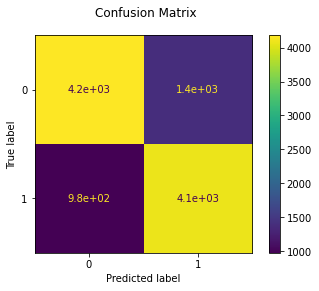



ROC AUC Score:: 0.871




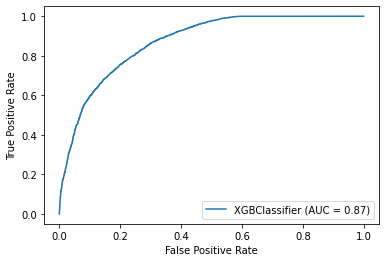

In [ ]:
model_eval(clf, X_train, Y_train, X_test, Y_test, X_val, Y_val)

## Plot Training Deviance

In [ ]:
print(clf)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


### Plot feature importance of the XGBoost Classifier Model

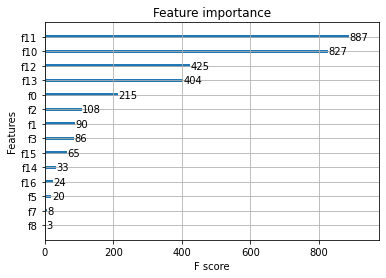

In [ ]:
from xgboost import plot_importance
from matplotlib import pyplot

# plot feature importance
plot_importance(clf)
pyplot.show()

# Evaluate Classification Performance of Offers Completed Using k-Nearest Neighbors (kNN) Algorithm


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Create KNN model
kNN = KNeighborsClassifier(n_neighbors=23)

# Train KNN model
kNN.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=23, p=2,
                     weights='uniform')

Model Evaluation:

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=23, p=2,
                     weights='uniform')


Accuracy score (training): 0.788
Accuracy score (test): 0.766
Accuracy score (validation): 0.770


Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.74      0.77      5574
           1       0.74      0.80      0.77      5066

    accuracy                           0.77     10640
   macro avg       0.77      0.77      0.77     10640
weighted avg       0.77      0.77      0.77     10640

Confusion matrix:
[[4119 1455]
 [ 989 4077]]




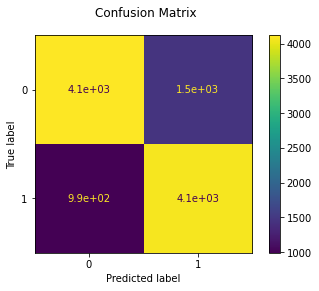



ROC AUC Score:: 0.860




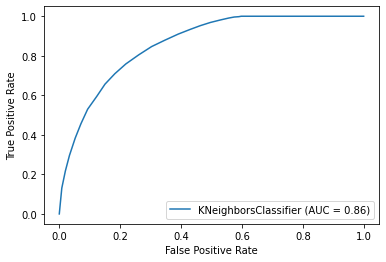

In [ ]:
# Evaluate KNN model performance
model_eval(kNN, X_train, Y_train, X_test, Y_test, X_val, Y_val)

Text(0, 0.5, 'Accuracy')

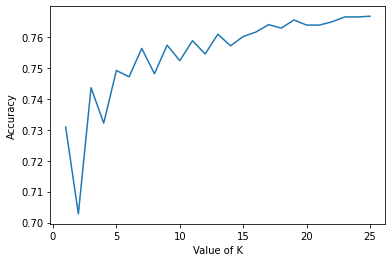

In [ ]:
# Follows example from https://www.tutorialspoint.com/scikit_learn/scikit_learn_kneighbors_classifier.htm 
# to evaluate best value of k

from sklearn import metrics

k_range = range(1,26)
scores = {}
scores_list = []
for k in k_range:
   classifier = KNeighborsClassifier(n_neighbors=k)
   classifier.fit(X_train, Y_train)
   y_pred = classifier.predict(X_test)
   scores[k] = metrics.accuracy_score(Y_test,y_pred)
   scores_list.append(metrics.accuracy_score(Y_test,y_pred))
#result = metrics.confusion_matrix(Y_test, y_pred)
#print("Confusion Matrix:")
#print(result)
#result1 = metrics.classification_report(Y_test, y_pred)
#print("Classification Report:",)
#print (result1)

# Plot data
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(k_range,scores_list)
plt.xlabel("Value of K")
plt.ylabel("Accuracy")

## Train baseline model using a support vector machine (SVM) clusting algorithm

In [ ]:
from sklearn import svm

# Create a SVM classifier with linear kernel
clfSVM = svm.SVC(kernel="linear")
clfSVM.fit(X_train, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Model Evaluation:

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


Accuracy score (training): 0.754
Accuracy score (test): 0.749
Accuracy score (validation): 0.753


Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.69      0.75      5574
           1       0.71      0.82      0.76      5066

    accuracy                           0.75     10640
   macro avg       0.76      0.76      0.75     10640
weighted avg       0.76      0.75      0.75     10640

Confusion matrix:
[[3864 1710]
 [ 918 4148]]




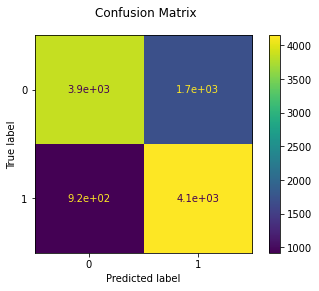

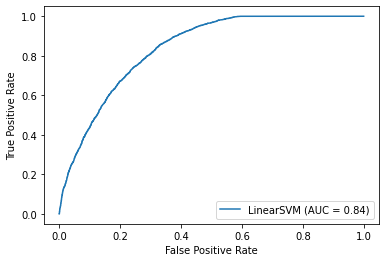

In [ ]:
model_eval(clfSVM, X_train, Y_train, X_test, Y_test, X_val, Y_val)

## Perform Logistic Regression as a baseline

In [ ]:
from sklearn.linear_model import LogisticRegression

# Create a logistic regression classifier
logReg = LogisticRegression()
logReg.max_iter=250
logReg.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=250,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Model Evaluation:

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=250,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


Accuracy score (training): 0.754
Accuracy score (test): 0.748
Accuracy score (validation): 0.752


Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.69      0.74      5574
           1       0.71      0.82      0.76      5066

    accuracy                           0.75     10640
   macro avg       0.76      0.76      0.75     10640
weighted avg       0.76      0.75      0.75     10640

Confusion matrix:
[[3835 1739]
 [ 899 4167]]




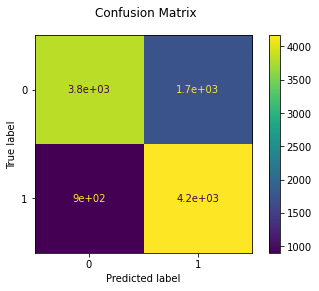



ROC AUC Score:: 0.837




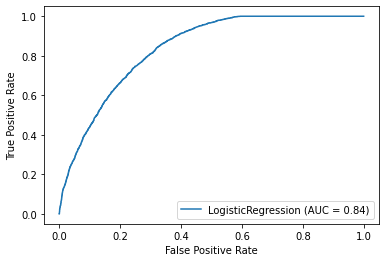

In [ ]:
model_eval(logReg, X_train, Y_train, X_test, Y_test, X_val, Y_val)